In [ ]:
# https://www.kaggle.com/henriqueyamahata/bank-marketing

In [ ]:
"""The purpose of this analysis is to predict whether or not a customer will make a new deposit into a current or new account after
a given campagin.""".replace("\n", "")

# Results
 - scroll down to see the full work flow

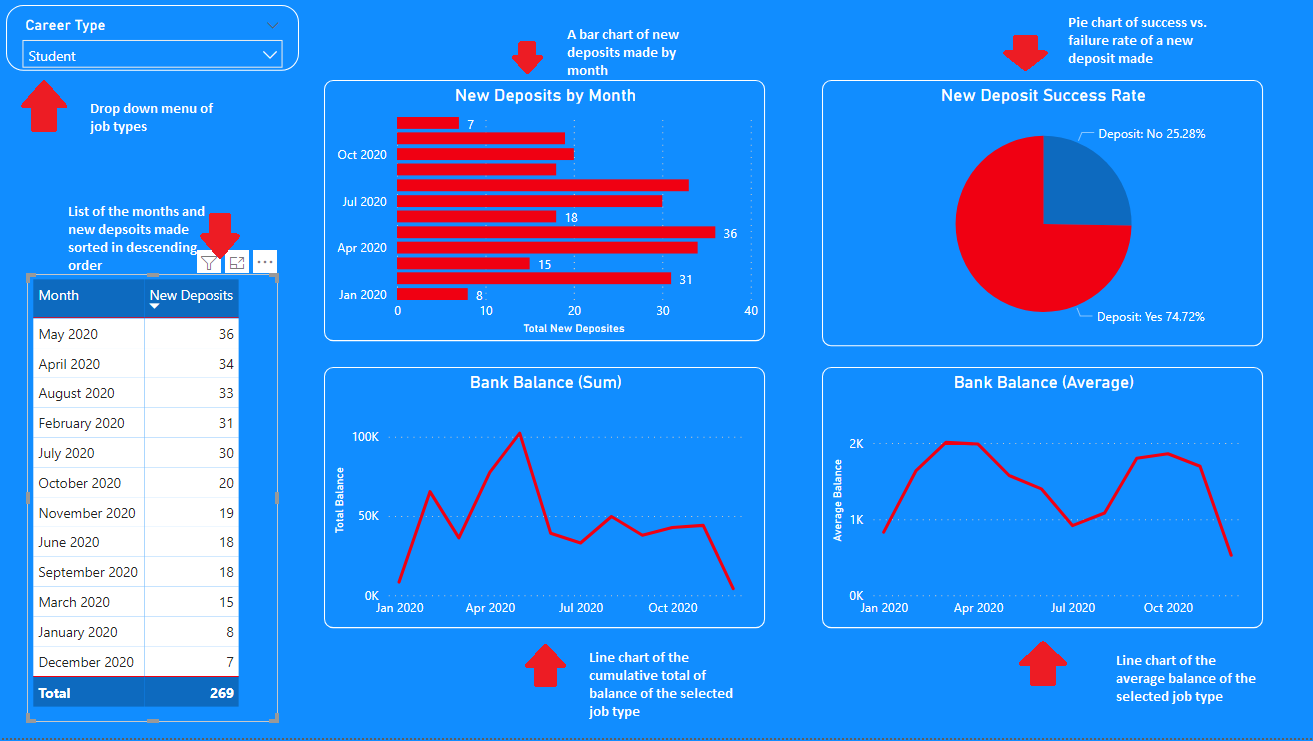

In [38]:
from IPython.display import Image
Image("bank_dashboard.PNG") # dashboard was created in Power BI

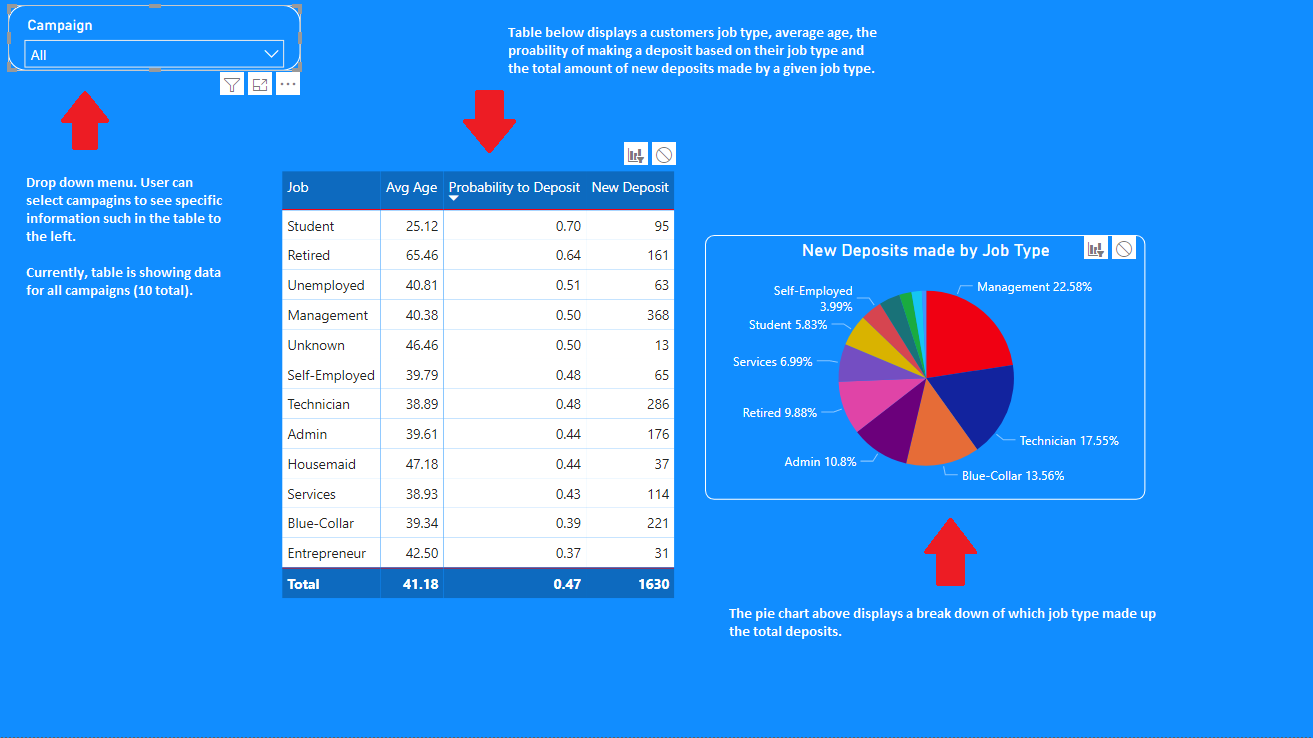

In [39]:
Image("bank_dashboard_2.PNG") 

In [ ]:
print("Precision:", pre)
print("Recall:", re)
print("Accuracy:", acc)

In [ ]:
"""A Precision score of 83%  tells me that when the model is making a prediction of 1 (makes depsoit) it is correct 83% of the time.
 A recall score of 83% tells me that this model is able to detect 83% of customers who are likely to make a deposit. Lastly, an accuracy of 
83% means that whenever this model is making a prediction, whether 0 (no deposit) or 1 (depsoit) it is correct 83% of the time.""".replace("\n","")

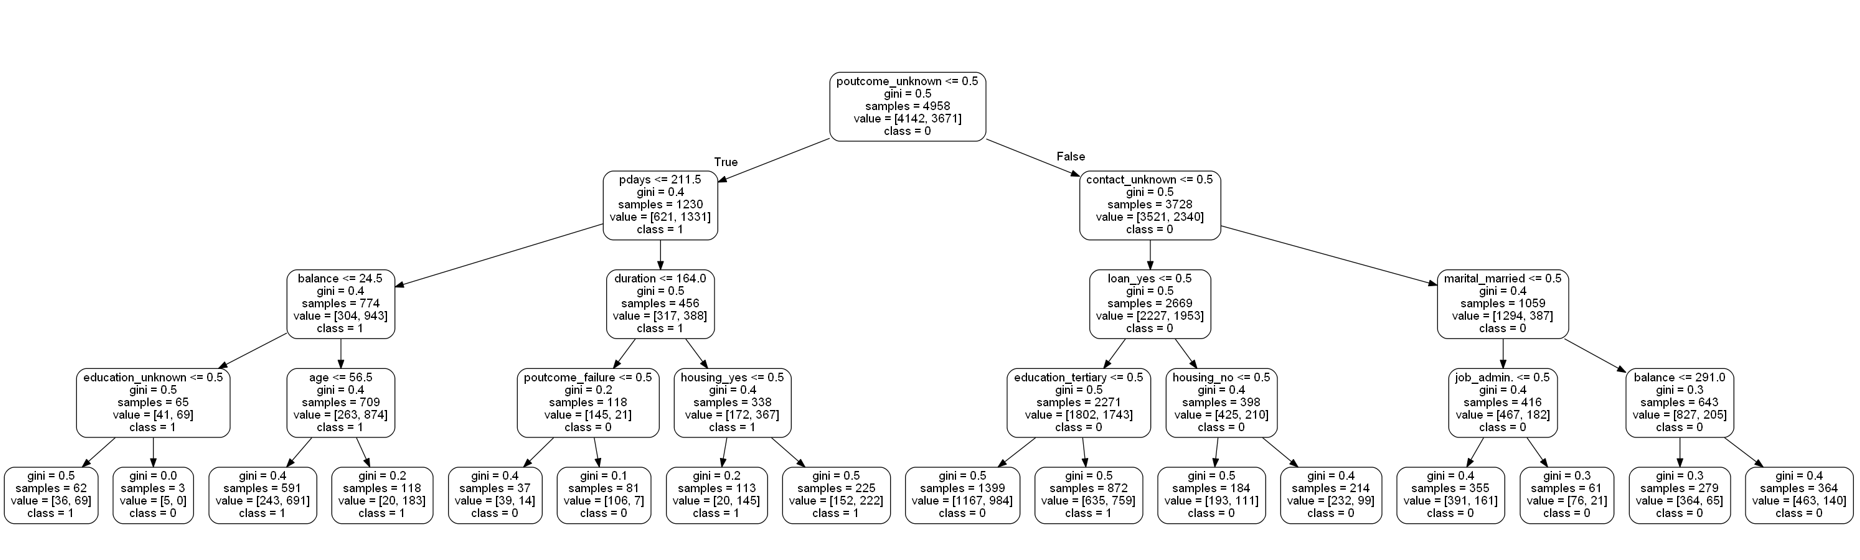

In [148]:
Image("bank_random_forrest.PNG") 

In [ ]:
predictions_df_signed = predictions_df[predictions_df['prediction'] == 1]
predictions_df_signed.head(5)

In [ ]:
"""The above dataframe is a list of customers who were predicted to make a deposit after being exposed to a given campagin. These and their listed probabilites would make a 
good starting point of who to target during a campagin""".replace("\n", "")

In [ ]:
jobs = ['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown']
for i  in jobs:
    print(i)
    print(predictions_df[predictions_df[i] == 1]['probability'].describe())

In [149]:
"""Based on these results, if I were to target a specific customer type using their listed job, I would target the following based on their success rate:
students (70%), retirees (64%), and management (50%) type of job roles""".replace("\n","")

'Based on these results, if I were to target a specific customer type using their listed job, I would target the following based on their success rate:students (70%), retirees (64%), and management (50%) type of job roles'

# Load Libraries

In [150]:
import numpy as np
import pandas as pd
from warnings import filterwarnings
from collections import Counter
from IPython.display import Image


# Data Viz
from tqdm import tqdm_notebook
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Data Pre-processing Libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold, RandomizedSearchCV

# Modelling Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier


# Evaluation & CV Libraries
from sklearn.metrics import precision_score,accuracy_score, recall_score, f1_score, confusion_matrix

# Load Data

In [2]:
bank_data = pd.read_csv(r'C:\Users\ranih\OneDrive\Desktop\Python For Real\Github\Data\Kaggle\Bank\bank_term_deposit.csv')

In [3]:
bank_data.loc[bank_data['job'] == 'management', 'Job'] = 'Management'
bank_data.loc[bank_data['job'] == 'blue-collar', 'Job'] = 'Blue-Collar'
bank_data.loc[bank_data['job'] == 'technician', 'Job'] = 'Technician'
bank_data.loc[bank_data['job'] == 'admin.', 'Job'] = 'Admin'
bank_data.loc[bank_data['job'] == 'services', 'Job'] = 'Services'
bank_data.loc[bank_data['job'] == 'retired', 'Job'] = 'Retired'


bank_data.loc[bank_data['job'] == 'self-employed', 'Job'] = 'Self-Employed'
bank_data.loc[bank_data['job'] == 'student', 'Job'] = 'Student'
bank_data.loc[bank_data['job'] == 'unemployed', 'Job'] = 'Unemployed'
bank_data.loc[bank_data['job'] == 'entrepreneur', 'Job'] = 'Entrepreneur'
bank_data.loc[bank_data['job'] == 'housemaid', 'Job'] = 'Housemaid'
bank_data.loc[bank_data['job'] == 'unknown', 'Job'] = 'Unknown'

bank_data.head(15)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,Job
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,Admin
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,Admin
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,Technician
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,Services
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,Admin
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes,Management
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes,Management
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes,Retired
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes,Technician
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes,Services


In [4]:
bank_data.set_index(['Job','month'], inplace=True)
deposit = bank_data['deposit']
bank_data.head(3)

age         job  marital  education default  balance  \
Job        month                                                         
Admin      may     59      admin.  married  secondary      no     2343   
           may     56      admin.  married  secondary      no       45   
Technician may     41  technician  married  secondary      no     1270   

                 housing loan  contact  day  duration  campaign  pdays  \
Job        month                                                         
Admin      may       yes   no  unknown    5      1042         1     -1   
           may        no   no  unknown    5      1467         1     -1   
Technician may       yes   no  unknown    5      1389         1     -1   

                  previous poutcome deposit  
Job        month                             
Admin      may           0  unknown     yes  
           may           0  unknown     yes  
Technician may           0  unknown     yes

In [5]:
print("rows:", bank_data.shape[0])
print("columns:", bank_data.shape[1])

rows: 11162
columns: 16


In [6]:
bank_data.isnull().sum() # there are no missing values in this data set

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [7]:
bank_data['job'].value_counts() # count of the different job types of a given customer

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

# Data Exploration

In [8]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11162 entries, ('Admin', 'may') to ('Technician', 'jul')
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  duration   11162 non-null  int64 
 11  campaign   11162 non-null  int64 
 12  pdays      11162 non-null  int64 
 13  previous   11162 non-null  int64 
 14  poutcome   11162 non-null  object
 15  deposit    11162 non-null  object
dtypes: int64(7), object(9)
memory usage: 1.4+ MB


In [9]:
bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [10]:
deposit =round(bank_data['deposit'].value_counts()[1]/(bank_data['deposit'].value_counts()[0] + bank_data['deposit'].value_counts()[1])
,2)
no_deposit =round(bank_data['deposit'].value_counts()[0]/(bank_data['deposit'].value_counts()[0] + bank_data['deposit'].value_counts()[1])
,2)
print("Percentage of new deposit made:", deposit)
print("Percentage of no deposit made:", no_deposit)

Percentage of new deposit made: 0.47
Percentage of no deposit made: 0.53


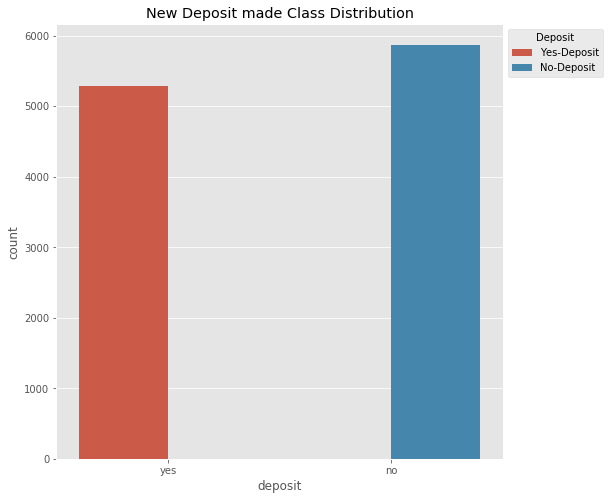

In [11]:
fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.countplot(x='deposit', hue='deposit' ,data=bank_data)




plt.title("New Deposit made Class Distribution")
legend_labels = ['Yes-Deposit', 'No-Deposit']
ax.legend(legend_labels,bbox_to_anchor=(1,1), title='Deposit')
plt.show()

In [12]:
"""Overall, the campagins lead to more people declining to make a new deposit. Moving forward, there should be a more targeted approach 
with future campagins that is focused on customers that are the most likely to make a deposit.""".replace("\n", "")

'Overall, the campagins lead to more people declining to make a new deposit. Moving forward, there should be a more targeted approach with future campagins that is focused on customers that are the most likely to make a deposit.'

# Model
 - Random Forrest

In [13]:
bank_data.drop(['day'], axis = 1, inplace = True) # dropping data that is not associated with a campagin or indiviual customer

In [14]:
bank_data = pd.get_dummies(bank_data)
bank_data.head(3)

age  balance  duration  campaign  pdays  previous  \
Job        month                                                      
Admin      may     59     2343      1042         1     -1         0   
           may     56       45      1467         1     -1         0   
Technician may     41     1270      1389         1     -1         0   

                  job_admin.  job_blue-collar  job_entrepreneur  \
Job        month                                                  
Admin      may             1                0                 0   
           may             1                0                 0   
Technician may             0                0                 0   

                  job_housemaid  ...  loan_yes  contact_cellular  \
Job        month                 ...                               
Admin      may                0  ...         0                 0   
           may                0  ...         0                 0   
Technician may                0  ...         0                 0   

                  contact_telephone  contact_unknown  poutcome_failure  \
Job        month                                                         
Admin      may                    0                1                 0   
           may                    0                1                 0   
Technician may                    0                1                 0   

                  poutcome_other  poutcome_success  poutcome_unknown  \
Job        month                                                       
Admin      may                 0                 0                 1   
           may                 0                 0                 1   
Technician may                 0                 0                 1   

                  deposit_no  deposit_yes  
Job        month                           
Admin      may             0            1  
           may             0            1  
Technician may             0            1  

[3 rows x 40 columns]

In [15]:
# shuffle the data
bank_data = bank_data.sample(frac=1)

In [16]:
bank_data['deposit_yes'] = bank_data['deposit_yes'].astype('bool').astype('int64')

In [17]:
X = bank_data.drop(['deposit_no', 'deposit_yes'], axis = 1)
y = bank_data.deposit_yes

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)

In [19]:
rf = RandomForestClassifier() # calling the random forrest model
rf.fit(X_train, y_train) # training the random forrest model
y_proba = rf.predict_proba(X_test) # making predictions on unseen data
y_pred = rf.predict(X_test) # making predictions on unseen data and associated probabilities of classifcation between each class value

In [20]:
pre = round(precision_score(y_test, y_pred, average='macro'),2)
re = round(recall_score(y_test, y_pred, average='macro'),2)
acc = round(accuracy_score(y_test, y_pred),2)

In [21]:
print("Precision:", pre)
print("Recall:", re)
print("Accuracy:", acc)

Precision: 0.82
Recall: 0.82
Accuracy: 0.82


In [22]:
"""I will tune this model to see if any improvements can be made."""

'I will tune this model to see if any improvements can be made.'

In [122]:
model_parameters = {

    'Random Forest':
    {
        'model':RandomForestClassifier(),
        'params':
        {
            'criterion': ['gini'],
            'n_estimators':[10,20,30,40,50],
            'max_features':['auto','sqrt','log2'],
            'max_depth':list(range(1,5))
        }
    }
}

In [123]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
scores = list()

for model_name, parameters in model_parameters.items():
    random_search = RandomizedSearchCV(parameters['model'], parameters['params'], cv = cv, n_iter=20) 
    random_search.fit(X,y)
    scores.append([model_name, dict(random_search.best_params_), random_search.best_score_])

In [124]:
data = pd.DataFrame(scores, columns = ['Model', 'Parameters', 'Score'])
data

,Model,Parameters,Score
0,Random Forest,"{'n_estimators': 40, 'max_features': 'sqrt', '...",0.799811


In [125]:
data['Parameters'][0] # these will be the paramters used to create the random forrest 

{'n_estimators': 40,
 'max_features': 'sqrt',
 'max_depth': 4,
 'criterion': 'gini'}

In [137]:
rf = RandomForestClassifier(n_estimators= 40, max_features='sqrt', max_depth=4, criterion='gini')
rf.fit(X_train, y_train)
y_proba = rf.predict_proba(X_test)
y_pred = rf.predict(X_test)

In [138]:
pre = round(precision_score(y_test, y_pred, average='macro'),2)
re = round(recall_score(y_test, y_pred, average='macro'),2)
acc = round(accuracy_score(y_test, y_pred),2)

In [139]:
print("Precision:", pre)
print("Recall:", re)
print("Accuracy:", acc)

Precision: 0.8
Recall: 0.8
Accuracy: 0.8


In [140]:
"""After hyperparameter tuning, the model improve by 1 percentage point across the board, while this is marginal, this will be the final model used for predictions""".replace("/n","")

'After hyperparameter tuning, the model improve by 1 percentage point across the board, while this is marginal, this will be the final model used for predictions'

In [141]:
predictions_df = X_test.copy()
predictions_df['prediction'] = y_pred
predictions_df['probability'] = y_proba[:,1]
predictions_df.head()

age  balance  duration  campaign  pdays  previous  \
Job         month                                                      
Management  apr     30      424       298         4     -1         0   
            oct     30      565       104         1     -1         0   
            may     34      188       399         1     -1         0   
Blue-Collar may     40        0        59         4     -1         0   
Unemployed  jan     31      330       260         1    194         2   

                   job_admin.  job_blue-collar  job_entrepreneur  \
Job         month                                                  
Management  apr             0                0                 0   
            oct             0                0                 0   
            may             0                0                 0   
Blue-Collar may             0                1                 0   
Unemployed  jan             0                0                 0   

                   job_housemaid  ...  loan_yes  contact_cellular  \
Job         month                 ...                               
Management  apr                0  ...         0                 1   
            oct                0  ...         0                 1   
            may                0  ...         0                 1   
Blue-Collar may                0  ...         0                 0   
Unemployed  jan                0  ...         0                 1   

                   contact_telephone  contact_unknown  poutcome_failure  \
Job         month                                                         
Management  apr                    0                0                 0   
            oct                    0                0                 0   
            may                    0                0                 0   
Blue-Collar may                    0                1                 0   
Unemployed  jan                    0                0                 0   

                   poutcome_other  poutcome_success  poutcome_unknown  \
Job         month                                                       
Management  apr                 0                 0                 1   
            oct                 0                 0                 1   
            may                 0                 0                 1   
Blue-Collar may                 0                 0                 1   
Unemployed  jan                 0                 1                 0   

                   prediction  probability  
Job         month                           
Management  apr             1     0.560519  
            oct             0     0.363833  
            may             1     0.573675  
Blue-Collar may             0     0.193914  
Unemployed  jan             1     0.848756  

[5 rows x 40 columns]

In [142]:
predictions_df.reset_index(inplace=True)

In [143]:
predictions_df.head(3)

,Job,month,age,balance,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,prediction,probability
0,Management,apr,30,424,298,4,-1,0,0,0,...,0,1,0,0,0,0,0,1,1,0.560519
1,Management,oct,30,565,104,1,-1,0,0,0,...,0,1,0,0,0,0,0,1,0,0.363833
2,Management,may,34,188,399,1,-1,0,0,0,...,0,1,0,0,0,0,0,1,1,0.573675


In [144]:
# Outputed to be fed into Power BI for further visualizaton 
compression_opts = dict(method='zip',archive_name='predictions_df.csv')  
predictions_df.to_csv('predictions_df.zip', index=False, compression = compression_opts)

In [145]:
jobs = ['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown']
for i  in jobs:
    print(i)
    print(predictions_df[predictions_df[i] == 1]['probability'].describe())

job_admin.
count    406.000000
mean       0.466891
std        0.184173
min        0.141195
25%        0.329011
50%        0.466280
75%        0.583999
max        0.871864
Name: probability, dtype: float64
job_blue-collar
count    646.000000
mean       0.408469
std        0.165136
min        0.160750
25%        0.256874
50%        0.424278
75%        0.521999
max        0.876809
Name: probability, dtype: float64
job_entrepreneur
count    83.000000
mean      0.446991
std       0.157551
min       0.151337
25%       0.322451
50%       0.477031
75%       0.573045
max       0.829427
Name: probability, dtype: float64
job_housemaid
count    80.000000
mean      0.433591
std       0.150412
min       0.176119
25%       0.315222
50%       0.429678
75%       0.540181
max       0.848187
Name: probability, dtype: float64
job_management
count    730.000000
mean       0.496113
std        0.169758
min        0.152200
25%        0.356605
50%        0.507737
75%        0.609564
max        0.869458
Name: p

In [151]:
"""Based on these results, if I were to target a specific customer type using their listed job, I would target the following based on their success rate:
students (70%), retirees (64%), and management (50%) type of job roles""".replace("\n","")

'Based on these results, if I were to target a specific customer type using their listed job, I would target the following based on their success rate:students (70%), retirees (64%), and management (50%) type of job roles'

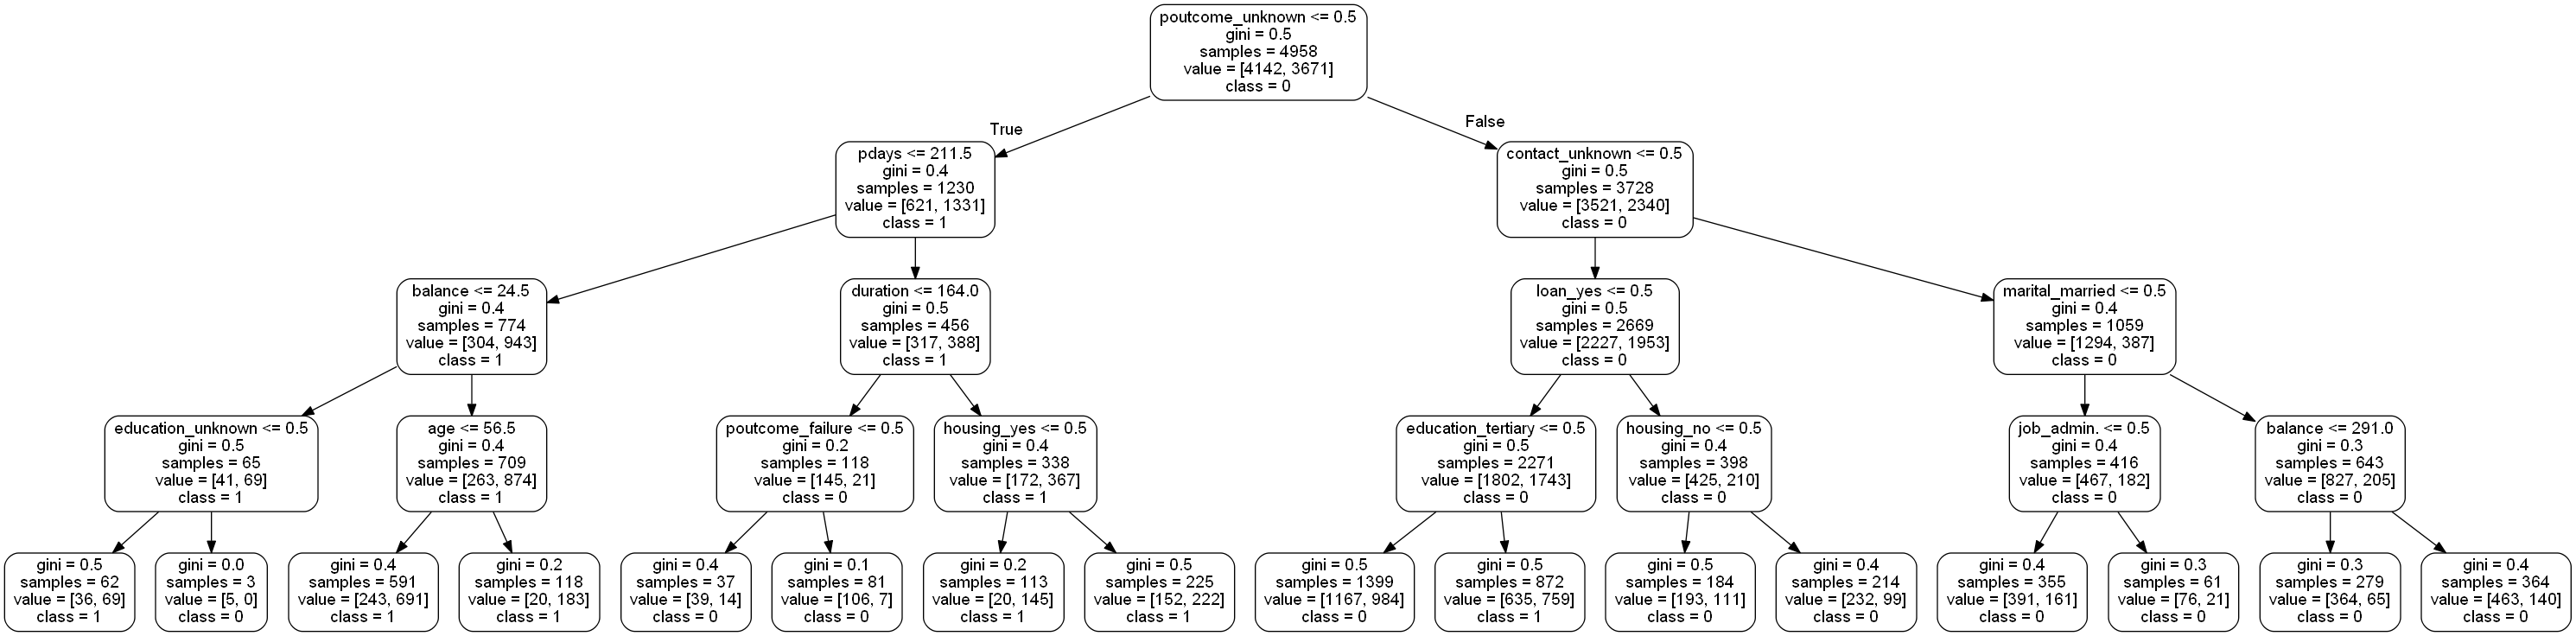

In [147]:
feature_cols = X_test.columns
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[7]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[7]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_cols, rounded = True, precision = 1,class_names=['0','1'])
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')
Image(graph.create_png())